<a href="https://colab.research.google.com/github/les1smore/Analysis-Portfolio/blob/main/DATA602_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 Data Manipulation with Numpy and Pandas

In [3]:
# Load the libraries
import pandas as pd
import numpy as np

In [4]:
# Load the three datasets
btc_usd = pd.read_csv('/content/BTC-USD (1).csv')
aapl = pd.read_csv('/content/AAPL (1).csv')
spy = pd.read_csv('/content/SPY (1).csv')

In [5]:
# Take a look at each dataframe
btc_usd.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
359,12/27/2021,50802.60938,51956.32813,50499.46875,50640.41797,50640.41797,2.432435e+10
360,12/28/2021,50679.85938,50679.85938,47414.21094,47588.85547,47588.85547,3.343038e+10
361,12/29/2021,47623.87109,48119.74219,46201.49609,46444.71094,46444.71094,3.004923e+10
362,12/30/2021,46490.60547,47879.96484,46060.31250,47178.12500,47178.12500,2.668649e+10
363,12/31/2021,47169.37109,48472.52734,45819.95313,46306.44531,46306.44531,3.697417e+10


In [6]:
aapl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,12/27/2021,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
248,12/28/2021,180.160004,181.330002,178.529999,179.289993,179.061859,79144300
249,12/29/2021,179.330002,180.630005,178.139999,179.380005,179.151749,62348900
250,12/30/2021,179.470001,180.570007,178.089996,178.199997,177.973251,59773000
251,12/31/2021,178.089996,179.229996,177.259995,177.570007,177.344055,64062300


In [7]:
spy.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600
248,2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600
249,2021-12-29,476.980011,478.559998,475.920013,477.480011,477.480011,54503000
250,2021-12-30,477.929993,479.000000,475.670013,476.160004,476.160004,55329000
251,2021-12-31,475.640015,476.859985,474.670013,474.959991,474.959991,65237400


In [8]:
# Take a look at the shape of each data frame
print(btc_usd.shape)
print(aapl.shape)
print(spy.shape)

(364, 7)
(252, 7)
(252, 7)


In [9]:
spy.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Q1
- Change the 'Date' column to pd.timestamp format
- Output the median timestamp for each df

In [10]:
# Change the data type in advance
btc_usd['Date'] = btc_usd['Date'].apply(lambda x: pd.Timestamp(x))
btc_usd.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [11]:
pd.Timestamp.fromordinal(int(btc_usd['Date'].apply(lambda x: x.toordinal()).median()))

Timestamp('2021-07-02 00:00:00')

In [12]:
# Keep doing this to appl
aapl['Date'] = aapl['Date'].apply(lambda x: pd.Timestamp(x))
aapl.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
pd.Timestamp.fromordinal(int(aapl['Date'].apply(lambda x: x.toordinal()).median()))

Timestamp('2021-07-04 00:00:00')

In [14]:
# Keep doing this to spy
spy['Date'] = spy['Date'].apply(lambda x: pd.Timestamp(x))
spy.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [15]:
pd.Timestamp.fromordinal(int(spy['Date'].apply(lambda x: x.toordinal()).median()))

Timestamp('2021-07-04 00:00:00')

## Q2
- Define a udf, called 'daily_return'
- Apply this function to both 'Open' and 'Adj Close' for each df; name the new columns properly.
- For each df: output the average Open_daily_return; output the average Adj_Close_daily_return, weighted by 'volume'

In [16]:
# Define the 'daily_return' function
daily_return = lambda x: (x-x.shift(-1))/x.shift(-1)

In [17]:
# Set Date as the new index before application
btc_usd = btc_usd.set_index('Date')

In [18]:
# Apply this function to btc_usd data
# Since floating data type has no shift attribute, here we apply the user defined function to the entire dataset
btc_usd2= btc_usd.apply(daily_return)
btc_usd2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-02,-0.085683,-0.041997,-0.092384,-0.019973,-0.019973,-0.137288
2021-01-03,-0.020772,0.034938,0.115921,0.025338,0.025338,-0.030780
2021-01-04,0.026078,-0.028962,-0.049582,-0.059440,-0.059440,0.201579
2021-01-05,-0.059875,-0.066218,-0.098253,-0.076904,-0.076904,-0.102831
2021-01-06,-0.076567,-0.082146,-0.081586,-0.064684,-0.064684,-0.111756
...,...,...,...,...,...,...
2021-12-27,0.002422,0.025187,0.065070,0.064123,0.064123,-0.272388
2021-12-28,0.064169,0.053203,0.026248,0.024635,0.024635,0.112520
2021-12-29,0.024376,0.005008,0.003065,-0.015546,-0.015546,0.126009


In [19]:
# Copy and paste the applied column 'Open' and 'Adj Close' to the btc_usd as 'Open_daily return' and 'Adj Close'
btc_usd['Open_daily_return'] = btc_usd2['Open']
btc_usd['Adj_Close_daily_return'] = btc_usd2['Adj Close']

In [20]:
# Check if it works
btc_usd

,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
Date,,,,,,,,
2021-01-02,29376.45508,33155.11719,29091.18164,32127.26758,32127.26758,6.786542e+10,-0.085683,-0.019973
2021-01-03,32129.40820,34608.55859,32052.31641,32782.02344,32782.02344,7.866524e+10,-0.020772,0.025338
2021-01-04,32810.94922,33440.21875,28722.75586,31971.91406,31971.91406,8.116348e+10,0.026078,-0.059440
2021-01-05,31977.04102,34437.58984,30221.18750,33992.42969,33992.42969,6.754732e+10,-0.059875,-0.076904
2021-01-06,34013.61328,36879.69922,33514.03516,36824.36328,36824.36328,7.528943e+10,-0.076567,-0.064684
...,...,...,...,...,...,...,...,...
2021-12-27,50802.60938,51956.32813,50499.46875,50640.41797,50640.41797,2.432435e+10,0.002422,0.064123
2021-12-28,50679.85938,50679.85938,47414.21094,47588.85547,47588.85547,3.343038e+10,0.064169,0.024635
2021-12-29,47623.87109,48119.74219,46201.49609,46444.71094,46444.71094,3.004923e+10,0.024376,-0.015546


In [21]:
# Apply this function to aapl dataset
aapl = aapl.set_index('Date')
aapl2 = aapl.apply(daily_return)

In [22]:
# Take a look at the new-indexed dataset
aapl2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,0.035922,0.014195,-0.013003,-0.012213,-0.012213,0.467281
2021-01-05,0.009161,0.005265,0.016221,0.034834,0.034834,-0.370261
2021-01-06,-0.004986,-0.004406,-0.011575,-0.032997,-0.032997,0.415318
2021-01-07,-0.030733,-0.007540,-0.018199,-0.008557,-0.008557,0.042032
2021-01-08,0.025079,0.018898,0.013463,0.023802,0.023802,0.047554


In [23]:
# Add the new column back to the appl data
aapl['Open_daily_return'] = aapl2['Open']
aapl['Adj_Close_daily_return'] = aapl2['Adj Close']
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
Date,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900,0.035922,-0.012213
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900,0.009161,0.034834
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000,-0.004986,-0.032997
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200,-0.030733,-0.008557
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073929,105158200,0.025079,0.023802


In [24]:
# Apply this function to spy dada
spy = spy.set_index('Date')
spy2 = spy.apply(daily_return)

In [25]:
# Check the applied value
spy2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,0.019587,0.007919,-0.008776,-0.006840,-0.006840,0.659147
2021-01-05,-0.004355,-0.011884,-0.002899,-0.005943,-0.005943,-0.384929
2021-01-06,-0.016990,-0.007686,-0.018063,-0.014640,-0.014640,0.570492
2021-01-07,-0.011797,-0.004168,-0.003156,-0.005665,-0.005665,-0.040604
2021-01-08,0.007252,0.002391,-0.001641,0.006787,0.006787,0.404480


In [26]:
# Add the new values back to spy data
spy['Open_daily_return'] = spy2['Open']
spy['Adj_Close_daily_return'] = spy2['Adj Close']
spy.head()

,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
Date,,,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,363.938812,110210800,0.019587,-0.006840
2021-01-05,368.100006,372.500000,368.049988,371.329987,366.445343,66426200,-0.004355,-0.005943
2021-01-06,369.709991,376.980011,369.119995,373.549988,368.636108,107997700,-0.016990,-0.014640
2021-01-07,376.100006,379.899994,375.910004,379.100006,374.113159,68766800,-0.011797,-0.005665
2021-01-08,380.589996,381.489990,377.100006,381.260010,376.244751,71677200,0.007252,0.006787


In [27]:
# Output the average open_daily_return for each dataset 
btc_usd_avg_open = btc_usd['Open_daily_return'].mean()
aapl_avg_open = aapl['Open_daily_return'].mean()
spy_avg_open = spy['Open_daily_return'].mean()
# Store them in a list then print out
ls = [btc_usd_avg_open, aapl_avg_open, spy_avg_open]
print(ls, sep = '\n')

[-0.00040447645743366334, -0.0010200135171495237, -0.0009128082439341305]


In [28]:
# Output the average Adj_Close_daily_return, weighted by volume
btc_usd_avg_adj = (btc_usd['Volume'] * btc_usd['Adj_Close_daily_return']).sum()/btc_usd['Volume'].sum()
aapl_avg_adj = (aapl['Volume'] * aapl['Adj_Close_daily_return']).sum()/aapl['Volume'].sum()
spy_avg_adj= (spy['Volume'] * spy['Adj_Close_daily_return']).sum()/spy['Volume'].sum()

# Store them in a list then print out
ls2 = [btc_usd_avg_adj, aapl_avg_adj, spy_avg_adj]
print(ls2, sep = '\n')

[-0.00037380879787828, -0.0011816640342177543, -0.001505103402922341]


## Q3
- Concatenate the 3 dataframes and have a column 'ticker'
- by ticker, output the Min, Max, Mean of `Open_daily_return`
- Percentile rank `Open_daily_return` across the df; name this column properly. Within each quartile bucket of `Open_daily_return` (0-25%th, 25% - 50%th, 50% - 75%th, and >75%), count the number of observations of each ticker

In [29]:
# Concatenate the 3 dataframes and add a identifier 'ticker'
df = pd.concat([aapl, btc_usd,spy], 
               keys = ['aapl', 'btc_usd','spy']).reset_index().rename(columns = {'level_0':'tickers'})
df

,tickers,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
0,aapl,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900.0,0.035922,-0.012213
1,aapl,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900.0,0.009161,0.034834
2,aapl,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000.0,-0.004986,-0.032997
3,aapl,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200.0,-0.030733,-0.008557
4,aapl,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073929,105158200.0,0.025079,0.023802
...,...,...,...,...,...,...,...,...,...,...
863,spy,2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600.0,-0.011848,0.000818
864,spy,2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600.0,0.001551,-0.001278
865,spy,2021-12-29,476.980011,478.559998,475.920013,477.480011,477.480011,54503000.0,-0.001988,0.002772
866,spy,2021-12-30,477.929993,479.000000,475.670013,476.160004,476.160004,55329000.0,0.004815,0.002527


In [30]:
# Group by each ticker to calculate the statistics of Open_daily_return
df.groupby('tickers')['Open_daily_return'].agg(['min', 'max', 'mean'])

,min,max,mean
tickers,,,
aapl,-0.047459,0.055059,-0.001020
btc_usd,-0.158020,0.168454,-0.000404
spy,-0.020803,0.024205,-0.000913


In [31]:
# Percentile ranke 'Open_daily_return' across the df
df['Percentile Rank'] = df.Open_daily_return.rank(pct=True)
df

,tickers,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return,Percentile Rank
0,aapl,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900.0,0.035922,-0.012213,0.932948
1,aapl,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900.0,0.009161,0.034834,0.760694
2,aapl,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000.0,-0.004986,-0.032997,0.380347
3,aapl,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200.0,-0.030733,-0.008557,0.095954
4,aapl,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073929,105158200.0,0.025079,0.023802,0.884393
...,...,...,...,...,...,...,...,...,...,...,...
863,spy,2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600.0,-0.011848,0.000818,0.236994
864,spy,2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600.0,0.001551,-0.001278,0.596532
865,spy,2021-12-29,476.980011,478.559998,475.920013,477.480011,477.480011,54503000.0,-0.001988,0.002772,0.478613
866,spy,2021-12-30,477.929993,479.000000,475.670013,476.160004,476.160004,55329000.0,0.004815,0.002527,0.675145


In [32]:
# Label each quartile bucket of Open_daily_return
df['Percentile Bin'] = pd.cut(df['Percentile Rank'], [0, 0.25, 0.5,0.75,1])
# Handle NA and label them as 'Missing Values'
df['Percentile Bin'] = (df['Percentile Bin'].cat.add_categories('Missing Values').fillna('Missing Values'))
df

,tickers,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return,Percentile Rank,Percentile Bin
0,aapl,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900.0,0.035922,-0.012213,0.932948,"(0.75, 1.0]"
1,aapl,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900.0,0.009161,0.034834,0.760694,"(0.75, 1.0]"
2,aapl,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000.0,-0.004986,-0.032997,0.380347,"(0.25, 0.5]"
3,aapl,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200.0,-0.030733,-0.008557,0.095954,"(0.0, 0.25]"
4,aapl,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073929,105158200.0,0.025079,0.023802,0.884393,"(0.75, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
863,spy,2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600.0,-0.011848,0.000818,0.236994,"(0.0, 0.25]"
864,spy,2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600.0,0.001551,-0.001278,0.596532,"(0.5, 0.75]"
865,spy,2021-12-29,476.980011,478.559998,475.920013,477.480011,477.480011,54503000.0,-0.001988,0.002772,0.478613,"(0.25, 0.5]"
866,spy,2021-12-30,477.929993,479.000000,475.670013,476.160004,476.160004,55329000.0,0.004815,0.002527,0.675145,"(0.5, 0.75]"


In [33]:
df.groupby(['Percentile Bin','tickers'])['Open_daily_return'].agg(['count'])

count
Percentile Bin tickers       
(0.0, 0.25]    aapl        60
               btc_usd    137
               spy         19
(0.25, 0.5]    aapl        65
               btc_usd     42
               spy        109
(0.5, 0.75]    aapl        74
               btc_usd     44
               spy         98
(0.75, 1.0]    aapl        52
               btc_usd    140
               spy         25
Missing Values aapl         0
               btc_usd      0
               spy          0

In [34]:
#df_concat['quartile_Open_daily_return'][df_concat['ticker'] == 'BTC'].value_counts()

## Q4
- Using the df from step3, pivot the long table into wide
- Indexed by date
- Column by ticker;
- Valued by Open
- Output
  1. show the shape of data prior and after the pivot
  2. compute the average of 'Open', group by ticker

In [35]:
# pivot the long table into wide
#df2 = df.melt(id_vars=['Date'],value_vars = ['Open'])


In [36]:
df2 = df.pivot(index='Date', columns = 'tickers', values = 'Open')
df2

tickers,aapl,btc_usd,spy
Date,,,
2021-01-02,NaN,29376.45508,NaN
2021-01-03,NaN,32129.40820,NaN
2021-01-04,133.520004,32810.94922,375.309998
2021-01-05,128.889999,31977.04102,368.100006
2021-01-06,127.720001,34013.61328,369.709991
...,...,...,...
2021-12-27,177.089996,50802.60938,472.059998
2021-12-28,180.160004,50679.85938,477.720001
2021-12-29,179.330002,47623.87109,476.980011


In [37]:
print(df.shape, df2.shape)

(868, 12) (364, 3)


In [38]:
df2.agg(['mean'])

tickers,aapl,btc_usd,spy
mean,140.861866,47452.687383,426.164723


## Q5
- Perform outer join of the 3 dfs from step2 on dates into another df, denoted as df_merge
- melt df_merge, denoted as df_melt, indexed by date, ticker;
- Output: compute the average Open by ticker, and compare the numbers against the output from 4.
Note: When merging the dfs, rename the column names properly

In [39]:
btc_usd['tickers'] = 'btc_usd'
aapl['tickers'] = 'aapl'
spy['tickers'] = 'spy'

In [40]:
df_merge = pd.merge(pd.merge(btc_usd, spy, how = 'outer', on = 'Date', suffixes = ['_btc_usd','_spy']), 
         aapl, how = 'outer', on = 'Date', suffixes = ['','_aapl'])
df_merge

,Open_btc_usd,High_btc_usd,Low_btc_usd,Close_btc_usd,Adj Close_btc_usd,Volume_btc_usd,Open_daily_return_btc_usd,Adj_Close_daily_return_btc_usd,tickers_btc_usd,Open_spy,High_spy,Low_spy,Close_spy,Adj Close_spy,Volume_spy,Open_daily_return_spy,Adj_Close_daily_return_spy,tickers_spy,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return,tickers
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-02,29376.45508,33155.11719,29091.18164,32127.26758,32127.26758,6.786542e+10,-0.085683,-0.019973,btc_usd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,32129.40820,34608.55859,32052.31641,32782.02344,32782.02344,7.866524e+10,-0.020772,0.025338,btc_usd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,32810.94922,33440.21875,28722.75586,31971.91406,31971.91406,8.116348e+10,0.026078,-0.059440,btc_usd,375.309998,375.450012,364.820007,368.790009,363.938812,110210800.0,0.019587,-0.006840,spy,133.520004,133.610001,126.760002,129.410004,128.453445,143301900.0,0.035922,-0.012213,aapl
2021-01-05,31977.04102,34437.58984,30221.18750,33992.42969,33992.42969,6.754732e+10,-0.059875,-0.076904,btc_usd,368.100006,372.500000,368.049988,371.329987,366.445343,66426200.0,-0.004355,-0.005943,spy,128.889999,131.740005,128.429993,131.009995,130.041611,97664900.0,0.009161,0.034834,aapl
2021-01-06,34013.61328,36879.69922,33514.03516,36824.36328,36824.36328,7.528943e+10,-0.076567,-0.064684,btc_usd,369.709991,376.980011,369.119995,373.549988,368.636108,107997700.0,-0.016990,-0.014640,spy,127.720001,131.050003,126.379997,126.599998,125.664207,155088000.0,-0.004986,-0.032997,aapl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.60938,51956.32813,50499.46875,50640.41797,50640.41797,2.432435e+10,0.002422,0.064123,btc_usd,472.059998,477.309998,472.010010,477.260010,477.260010,56808600.0,-0.011848,0.000818,spy,177.089996,180.419998,177.070007,180.330002,180.100540,74919600.0,-0.017040,0.005801,aapl
2021-12-28,50679.85938,50679.85938,47414.21094,47588.85547,47588.85547,3.343038e+10,0.064169,0.024635,btc_usd,477.720001,478.809998,476.059998,476.869995,476.869995,47274600.0,0.001551,-0.001278,spy,180.160004,181.330002,178.529999,179.289993,179.061859,79144300.0,0.004628,-0.000502,aapl
2021-12-29,47623.87109,48119.74219,46201.49609,46444.71094,46444.71094,3.004923e+10,0.024376,-0.015546,btc_usd,476.980011,478.559998,475.920013,477.480011,477.480011,54503000.0,-0.001988,0.002772,spy,179.330002,180.630005,178.139999,179.380005,179.151749,62348900.0,-0.000780,0.006622,aapl


In [41]:
df_melt = pd.melt(df_merge.reset_index(),id_vars=['Date','tickers_spy','tickers_btc_usd','tickers'])
df_melt

,Date,tickers_spy,tickers_btc_usd,tickers,variable,value
0,2021-01-02,NaN,btc_usd,NaN,Open_btc_usd,29376.455080
1,2021-01-03,NaN,btc_usd,NaN,Open_btc_usd,32129.408200
2,2021-01-04,spy,btc_usd,aapl,Open_btc_usd,32810.949220
3,2021-01-05,spy,btc_usd,aapl,Open_btc_usd,31977.041020
4,2021-01-06,spy,btc_usd,aapl,Open_btc_usd,34013.613280
...,...,...,...,...,...,...
8731,2021-12-27,spy,btc_usd,aapl,Adj_Close_daily_return,0.005801
8732,2021-12-28,spy,btc_usd,aapl,Adj_Close_daily_return,-0.000502
8733,2021-12-29,spy,btc_usd,aapl,Adj_Close_daily_return,0.006622
8734,2021-12-30,spy,btc_usd,aapl,Adj_Close_daily_return,0.003548


In [42]:
df_melt[df_melt.variable == 'Open'].groupby('tickers').mean('value')

,value
tickers,
aapl,140.861866


In [43]:
df_melt[df_melt.variable == 'Open_btc_usd'].groupby('tickers_btc_usd').mean('value')

,value
tickers_btc_usd,
btc_usd,47452.687383


In [44]:
df_melt[df_melt.variable == 'Open_spy'].groupby('tickers_spy').mean('value')

,value
tickers_spy,
spy,426.164723


The numbers here compared to the output from 4 are the same.

## Q6
- Using df_melt, define a 7-day moving avg of 'Open_daily_return'

In [45]:
df_melt

,Date,tickers_spy,tickers_btc_usd,tickers,variable,value
0,2021-01-02,NaN,btc_usd,NaN,Open_btc_usd,29376.455080
1,2021-01-03,NaN,btc_usd,NaN,Open_btc_usd,32129.408200
2,2021-01-04,spy,btc_usd,aapl,Open_btc_usd,32810.949220
3,2021-01-05,spy,btc_usd,aapl,Open_btc_usd,31977.041020
4,2021-01-06,spy,btc_usd,aapl,Open_btc_usd,34013.613280
...,...,...,...,...,...,...
8731,2021-12-27,spy,btc_usd,aapl,Adj_Close_daily_return,0.005801
8732,2021-12-28,spy,btc_usd,aapl,Adj_Close_daily_return,-0.000502
8733,2021-12-29,spy,btc_usd,aapl,Adj_Close_daily_return,0.006622
8734,2021-12-30,spy,btc_usd,aapl,Adj_Close_daily_return,0.003548


In [46]:
# filter aapl
melt_aapl = df_melt[df_melt.variable == 'Open_daily_return'].set_index('Date')
melt_aapl = melt_aapl[melt_aapl['value'].notna()]
melt_aapl

,tickers_spy,tickers_btc_usd,tickers,variable,value
Date,,,,,
2021-01-04,spy,btc_usd,aapl,Open_daily_return,0.035922
2021-01-05,spy,btc_usd,aapl,Open_daily_return,0.009161
2021-01-06,spy,btc_usd,aapl,Open_daily_return,-0.004986
2021-01-07,spy,btc_usd,aapl,Open_daily_return,-0.030733
2021-01-08,spy,btc_usd,aapl,Open_daily_return,0.025079
...,...,...,...,...,...
2021-12-23,spy,btc_usd,aapl,Open_daily_return,-0.007002
2021-12-27,spy,btc_usd,aapl,Open_daily_return,-0.017040
2021-12-28,spy,btc_usd,aapl,Open_daily_return,0.004628


In [47]:
# calculate the moving average for aapl
melt_aapl['Open_daily_return_7day_MA_aapl'] = melt_aapl['value'].rolling(window = 7).mean()
melt_aapl

,tickers_spy,tickers_btc_usd,tickers,variable,value,Open_daily_return_7day_MA_aapl
Date,,,,,,
2021-01-04,spy,btc_usd,aapl,Open_daily_return,0.035922,NaN
2021-01-05,spy,btc_usd,aapl,Open_daily_return,0.009161,NaN
2021-01-06,spy,btc_usd,aapl,Open_daily_return,-0.004986,NaN
2021-01-07,spy,btc_usd,aapl,Open_daily_return,-0.030733,NaN
2021-01-08,spy,btc_usd,aapl,Open_daily_return,0.025079,NaN
...,...,...,...,...,...,...
2021-12-23,spy,btc_usd,aapl,Open_daily_return,-0.007002,-0.001298
2021-12-27,spy,btc_usd,aapl,Open_daily_return,-0.017040,-0.000409
2021-12-28,spy,btc_usd,aapl,Open_daily_return,0.004628,-0.007609


In [48]:
# filter btc_usd
melt_btc_usd = df_melt[df_melt.variable == 'Open_daily_return_btc_usd'].set_index('Date')
melt_btc_usd = melt_btc_usd[melt_btc_usd['value'].notna()]
melt_btc_usd

,tickers_spy,tickers_btc_usd,tickers,variable,value
Date,,,,,
2021-01-02,NaN,btc_usd,NaN,Open_daily_return_btc_usd,-0.085683
2021-01-03,NaN,btc_usd,NaN,Open_daily_return_btc_usd,-0.020772
2021-01-04,spy,btc_usd,aapl,Open_daily_return_btc_usd,0.026078
2021-01-05,spy,btc_usd,aapl,Open_daily_return_btc_usd,-0.059875
2021-01-06,spy,btc_usd,aapl,Open_daily_return_btc_usd,-0.076567
...,...,...,...,...,...
2021-12-26,NaN,btc_usd,NaN,Open_daily_return_btc_usd,-0.007360
2021-12-27,spy,btc_usd,aapl,Open_daily_return_btc_usd,0.002422
2021-12-28,spy,btc_usd,aapl,Open_daily_return_btc_usd,0.064169


In [49]:
# calculate the moving average for btc_usd
melt_btc_usd['Open_daily_return_7day_MA_btc_usd'] = melt_btc_usd['value'].rolling(window = 7).mean()
melt_btc_usd

,tickers_spy,tickers_btc_usd,tickers,variable,value,Open_daily_return_7day_MA_btc_usd
Date,,,,,,
2021-01-02,NaN,btc_usd,NaN,Open_daily_return_btc_usd,-0.085683,NaN
2021-01-03,NaN,btc_usd,NaN,Open_daily_return_btc_usd,-0.020772,NaN
2021-01-04,spy,btc_usd,aapl,Open_daily_return_btc_usd,0.026078,NaN
2021-01-05,spy,btc_usd,aapl,Open_daily_return_btc_usd,-0.059875,NaN
2021-01-06,spy,btc_usd,aapl,Open_daily_return_btc_usd,-0.076567,NaN
...,...,...,...,...,...,...
2021-12-26,NaN,btc_usd,NaN,Open_daily_return_btc_usd,-0.007360,-0.011730
2021-12-27,spy,btc_usd,aapl,Open_daily_return_btc_usd,0.002422,-0.010839
2021-12-28,spy,btc_usd,aapl,Open_daily_return_btc_usd,0.064169,0.004316


In [50]:
# spy
melt_spy = df_melt[df_melt.variable == 'Open_daily_return_spy'].set_index('Date')
melt_spy = melt_spy[melt_spy['value'].notna()]
melt_spy
# calculate the moving average for spy
melt_spy['Open_daily_return_7day_MA_spy'] = melt_spy['value'].rolling(window = 7).mean()
melt_spy

,tickers_spy,tickers_btc_usd,tickers,variable,value,Open_daily_return_7day_MA_spy
Date,,,,,,
2021-01-04,spy,btc_usd,aapl,Open_daily_return_spy,0.019587,NaN
2021-01-05,spy,btc_usd,aapl,Open_daily_return_spy,-0.004355,NaN
2021-01-06,spy,btc_usd,aapl,Open_daily_return_spy,-0.016990,NaN
2021-01-07,spy,btc_usd,aapl,Open_daily_return_spy,-0.011797,NaN
2021-01-08,spy,btc_usd,aapl,Open_daily_return_spy,0.007252,NaN
...,...,...,...,...,...,...
2021-12-23,spy,btc_usd,aapl,Open_daily_return_spy,-0.007012,-0.002528
2021-12-27,spy,btc_usd,aapl,Open_daily_return_spy,-0.011848,-0.001454
2021-12-28,spy,btc_usd,aapl,Open_daily_return_spy,0.001551,-0.004643


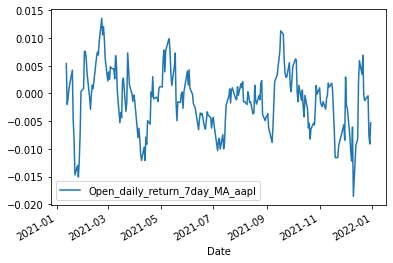

In [51]:
# plot aapl
melt_aapl.plot(y = 'Open_daily_return_7day_MA_aapl')

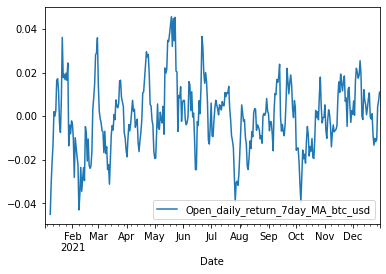

In [52]:
melt_btc_usd.plot(y = 'Open_daily_return_7day_MA_btc_usd', kind = 'line')

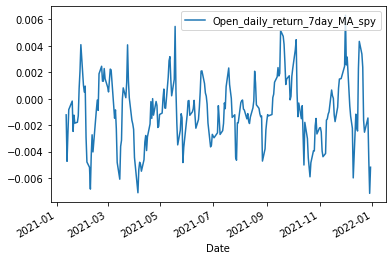

In [53]:
melt_spy.plot(y = 'Open_daily_return_7day_MA_spy', kind = 'line')

## Q7
- Perform an inner join like step5
- The difference in the number of rows between 5 and 7
- A short sentence describing your investigation on the root cause why the 3 dfs' dates are not alined

In [54]:
# create a ticker column for each data frame
btc_usd['tickers'] = 'btc_usd'
aapl['tickers'] = 'aapl'
spy['tickers'] = 'spy'

In [55]:
df_merge2 = pd.merge(pd.merge(btc_usd, spy, how = 'inner', on = 'Date', suffixes = ['_btc_usd','_spy']), 
         aapl, how = 'outer', on = 'Date', suffixes = ['','_aapl'])
df_merge2

,Open_btc_usd,High_btc_usd,Low_btc_usd,Close_btc_usd,Adj Close_btc_usd,Volume_btc_usd,Open_daily_return_btc_usd,Adj_Close_daily_return_btc_usd,tickers_btc_usd,Open_spy,High_spy,Low_spy,Close_spy,Adj Close_spy,Volume_spy,Open_daily_return_spy,Adj_Close_daily_return_spy,tickers_spy,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return,tickers
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,32810.94922,33440.21875,28722.75586,31971.91406,31971.91406,8.116348e+10,0.026078,-0.059440,btc_usd,375.309998,375.450012,364.820007,368.790009,363.938812,110210800,0.019587,-0.006840,spy,133.520004,133.610001,126.760002,129.410004,128.453445,143301900,0.035922,-0.012213,aapl
2021-01-05,31977.04102,34437.58984,30221.18750,33992.42969,33992.42969,6.754732e+10,-0.059875,-0.076904,btc_usd,368.100006,372.500000,368.049988,371.329987,366.445343,66426200,-0.004355,-0.005943,spy,128.889999,131.740005,128.429993,131.009995,130.041611,97664900,0.009161,0.034834,aapl
2021-01-06,34013.61328,36879.69922,33514.03516,36824.36328,36824.36328,7.528943e+10,-0.076567,-0.064684,btc_usd,369.709991,376.980011,369.119995,373.549988,368.636108,107997700,-0.016990,-0.014640,spy,127.720001,131.050003,126.379997,126.599998,125.664207,155088000,-0.004986,-0.032997,aapl
2021-01-07,36833.87500,40180.36719,36491.19141,39371.04297,39371.04297,8.476214e+10,-0.064697,-0.034967,btc_usd,376.100006,379.899994,375.910004,379.100006,374.113159,68766800,-0.011797,-0.005665,spy,128.360001,131.630005,127.860001,130.919998,129.952271,109578200,-0.030733,-0.008557,aapl
2021-01-08,39381.76563,41946.73828,36838.63672,40797.60938,40797.60938,8.810752e+10,-0.034492,0.013491,btc_usd,380.589996,381.489990,377.100006,381.260010,376.244751,71677200,0.007252,0.006787,spy,132.429993,132.630005,130.229996,132.050003,131.073929,105158200,0.025079,0.023802,aapl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.60938,51956.32813,50499.46875,50640.41797,50640.41797,2.432435e+10,0.002422,0.064123,btc_usd,472.059998,477.309998,472.010010,477.260010,477.260010,56808600,-0.011848,0.000818,spy,177.089996,180.419998,177.070007,180.330002,180.100540,74919600,-0.017040,0.005801,aapl
2021-12-28,50679.85938,50679.85938,47414.21094,47588.85547,47588.85547,3.343038e+10,0.064169,0.024635,btc_usd,477.720001,478.809998,476.059998,476.869995,476.869995,47274600,0.001551,-0.001278,spy,180.160004,181.330002,178.529999,179.289993,179.061859,79144300,0.004628,-0.000502,aapl
2021-12-29,47623.87109,48119.74219,46201.49609,46444.71094,46444.71094,3.004923e+10,0.024376,-0.015546,btc_usd,476.980011,478.559998,475.920013,477.480011,477.480011,54503000,-0.001988,0.002772,spy,179.330002,180.630005,178.139999,179.380005,179.151749,62348900,-0.000780,0.006622,aapl


In [56]:
print(df_merge.shape, df_merge2.shape)

(364, 27) (252, 27)


**Note**: `df_merge` has 365 rows and `df_merge2` has 251 rows. It is due to the major difference between inner and outer joins that inner join result in the interaction of two tables, while outer joins result in the union of two tables, thus `df_merge` has more rows than `df_merge2`. 

## Q8
- Write scalar UDFs and apply them to 'Open_daily_return' columns from 7

In [57]:
# Min Max Scalar
def min_max_scalar(x):
    return (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

In [70]:
opendaily = df_merge2[['Open_daily_return', 'Open_daily_return_btc_usd', 'Open_daily_return_spy']]
opendaily.columns = ['AAPL', 'BTC', 'SPY']
opendaily_minmax = opendaily.apply(min_max_scalar) 
opendaily_minmax

,AAPL,BTC,SPY
Date,,,
2021-01-04,0.813336,0.563899,0.897394
2021-01-05,0.552294,0.300621,0.365457
2021-01-06,0.414302,0.249493,0.084723
2021-01-07,0.163154,0.285851,0.200095
2021-01-08,0.707570,0.378371,0.623324
...,...,...,...
2021-12-27,0.296718,0.491439,0.198973
2021-12-28,0.508084,0.680572,0.496679
2021-12-29,0.455328,0.558685,0.418048


In [71]:
# Standard Scalar
def standard_scalar(x):
    return (x-x.mean(axis = 0))/(x.std(axis=0))

In [72]:
opendaily_standard = opendaily.apply(standard_scalar) 
opendaily_standard

,AAPL,BTC,SPY
Date,,,
2021-01-04,2.310815,0.547118,2.612020
2021-01-05,0.636823,-1.270469,-0.438557
2021-01-06,-0.248080,-1.623437,-2.048526
2021-01-07,-1.858624,-1.372436,-1.386883
2021-01-08,1.632569,-0.733708,1.040271
...,...,...,...
2021-12-27,-1.002114,0.046879,-1.393318
2021-12-28,0.353318,1.352594,0.313982
2021-12-29,0.015009,0.511125,-0.136959


## Q9 
- Randomly shuffle the data and split them into training and test sets
### Part I:
- Write a function that inputs a dataframe, a parameter that determines the size of the training (vs. testing) set, and a seed parameter in case users need to repeat the randomness.
- Output: apply the function to df of 7, use training = 80%, and set seed = 1. Return both training and testing data.

### Part II:
- Stratified splitting: randomly splitting data into train and test within each splitting. Change the function you wrote, and make sure it can handle group by splitting. 
- Output: Use df from step 3, let the strata be ticker labels, use training = 80%, and set seed = 1. Return both training and testing data.